# Analysis of nnUNet predictions

In this Notebook we investigate the performance of the different folds of the nnUNet trained on 269 validated on 67. 

The results explored investigate the performance of the model on the test set composed of 89 subjects (about 20% of each site).

In [1]:
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
from prettytable import PrettyTable
import ptitprince as pt


## Import of the 5 folds results

In [2]:
# we load the csv file of each fold
metrics = []
metrics.append(pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/nnunet_data/test_inference_D111_fold_0_metrics/results.csv'))
metrics.append(pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/nnunet_data/test_inference_D111_fold_1_metrics/results.csv'))
metrics.append(pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/nnunet_data/test_inference_D111_fold_2_metrics/results.csv'))
metrics.append(pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/nnunet_data/test_inference_D111_fold_3_metrics/results.csv'))
metrics.append(pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/nnunet_data/test_inference_D111_fold_4_metrics/results.csv'))

print("Columns: ", list(metrics[0].columns))

Columns:  ['name', 'site', 'contrast', 'Jaccard', 'Dice', 'Sensitivity', 'Specificity', 'PPV', 'NPV', 'RelativeVolumeError', 'HausdorffDistance', 'ContourMeanDistance', 'SurfaceDistance', 'PPVL', 'SensL', 'F1_score', 'NbTestedLesions', 'VolTestedLesions']


## Voxel-wide metrics

In this section we first look at lesion-wide metrics :
- Sensitivity
- Specicificity
- Dice

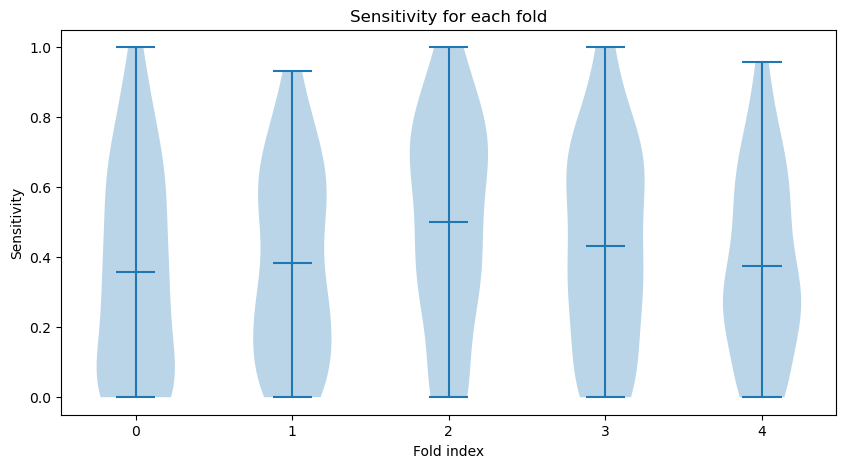

+------------+------+--------+--------------------+
| Fold index | Mean | Median | Standard deviation |
+------------+------+--------+--------------------+
|     0      | 0.36 |  0.33  |        0.29        |
|     1      | 0.38 |  0.35  |        0.27        |
|     2      | 0.5  |  0.52  |        0.3         |
|     3      | 0.43 |  0.42  |        0.29        |
|     4      | 0.38 |  0.33  |        0.26        |
+------------+------+--------+--------------------+


In [3]:
#we extract sensitivity from each fold
sensitivity = []
for i in range(5):
    sensitivity.append(metrics[i]['Sensitivity'].dropna())

# we plot the violin plot of the sensitivity for each fold with index starting at 0
plt.figure(figsize=(10, 5))
plt.violinplot(sensitivity, showmeans=True, positions=[0,1,2,3,4])
plt.xlabel('Fold index')
plt.ylabel('Sensitivity')
plt.title('Sensitivity for each fold')
plt.show()

# in a table we print the median and standard deviation of the sensitivity for each fold using prettytable
table = PrettyTable()
table.field_names = ['Fold index', 'Mean', 'Median', 'Standard deviation']
for i in range(5):
    table.add_row([i, round(sensitivity[i].mean(),2), round(sensitivity[i].median(),2), round(sensitivity[i].std(),2)])
print(table)

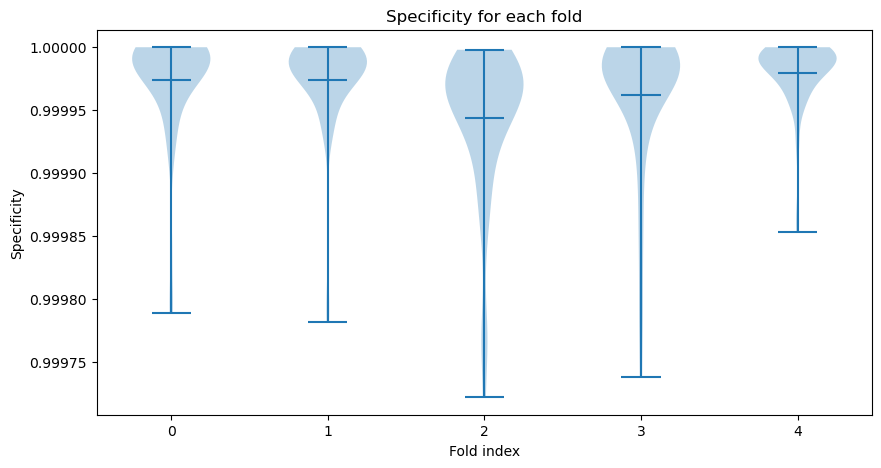

+------------+------+--------+--------------------+
| Fold index | Mean | Median | Standard deviation |
+------------+------+--------+--------------------+
|     0      | 1.0  |  1.0   |        0.0         |
|     1      | 1.0  |  1.0   |        0.0         |
|     2      | 1.0  |  1.0   |        0.0         |
|     3      | 1.0  |  1.0   |        0.0         |
|     4      | 1.0  |  1.0   |        0.0         |
+------------+------+--------+--------------------+


In [4]:
#we extract Specificity from each fold
specificity = []
for i in range(5):
    specificity.append(metrics[i]['Specificity'].dropna())

# we plot the violin plot of the specificity for each fold with index starting at 0
plt.figure(figsize=(10, 5))
plt.violinplot(specificity, showmeans=True, positions=[0,1,2,3,4])
plt.xlabel('Fold index')
plt.ylabel('Specificity')
plt.title('Specificity for each fold')
plt.show()

# in a table we print the median and standard deviation of the specificity for each fold using prettytable
table = PrettyTable()
table.field_names = ['Fold index', 'Mean', 'Median', 'Standard deviation']
for i in range(5):
    table.add_row([i, round(specificity[i].mean(),2), round(specificity[i].median(),2), round(specificity[i].std(),2)])
print(table)

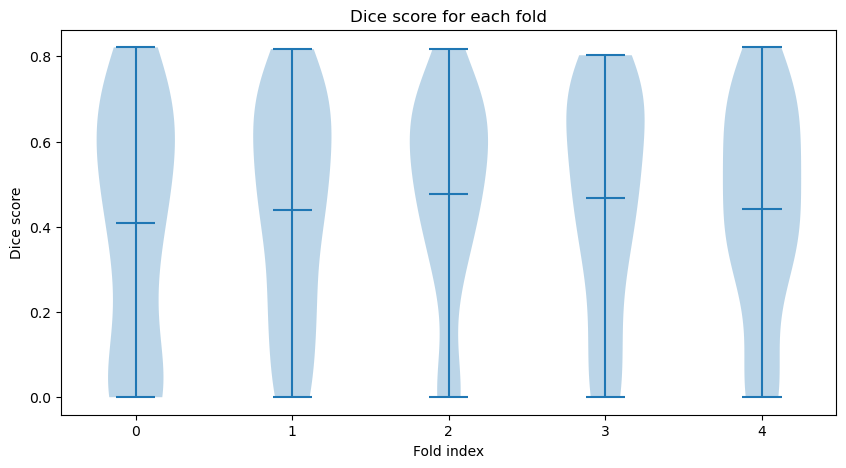

+------------+------+--------+--------------------+
| Fold index | Mean | Median | Standard deviation |
+------------+------+--------+--------------------+
|     0      | 0.41 |  0.46  |        0.28        |
|     1      | 0.44 |  0.45  |        0.25        |
|     2      | 0.48 |  0.52  |        0.24        |
|     3      | 0.47 |  0.52  |        0.25        |
|     4      | 0.44 |  0.45  |        0.24        |
+------------+------+--------+--------------------+


In [5]:
# now do the same for the dice score
dice = []
for i in range(5):
    dice.append(metrics[i]['Dice'].dropna())

plt.figure(figsize=(10, 5))
plt.violinplot(dice, showmeans=True, positions=[0,1,2,3,4])
plt.xlabel('Fold index')
plt.ylabel('Dice score')
plt.title('Dice score for each fold')
plt.show()

table = PrettyTable()
table.field_names = ['Fold index', 'Mean', 'Median', 'Standard deviation']
for i in range(5):
    table.add_row([i, round(dice[i].mean(),2), round(dice[i].median(),2), round(dice[i].std(),2)])
print(table)


## Lesion-wide metrics

In this section we look at lesion-wide metrics:
- PPVL (Positive Predictive Value for Lesions)
- SensL, Lesion detection sensitivity
- F1 Score, a F1 Score between PPVL and SensL

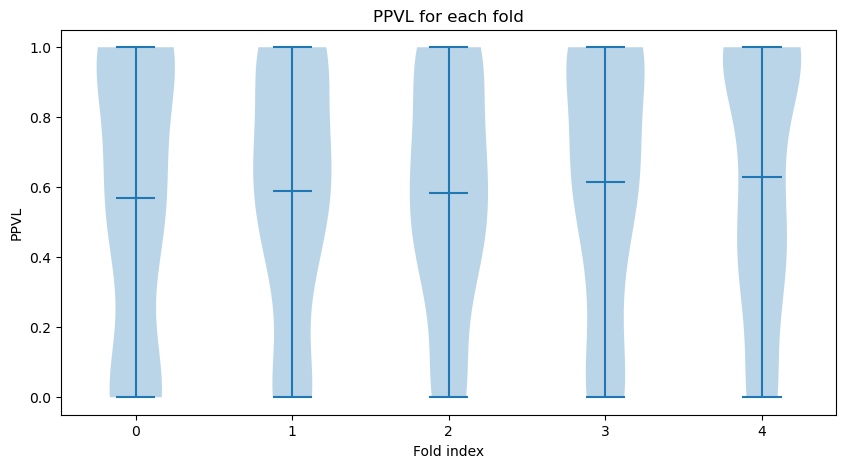

+------------+------+--------+--------------------+
| Fold index | Mean | Median | Standard deviation |
+------------+------+--------+--------------------+
|     0      | 0.57 |  0.67  |        0.4         |
|     1      | 0.59 |  0.67  |        0.35        |
|     2      | 0.58 |  0.6   |        0.33        |
|     3      | 0.61 |  0.67  |        0.36        |
|     4      | 0.63 |  0.71  |        0.37        |
+------------+------+--------+--------------------+


In [6]:
# we do the same as before for PPVL 
PPVL = []
for i in range(5):
    PPVL.append(metrics[i]['PPVL'].dropna())

plt.figure(figsize=(10, 5))
plt.violinplot(PPVL, showmeans=True, positions=[0,1,2,3,4])
plt.xlabel('Fold index')
plt.ylabel('PPVL')
plt.title('PPVL for each fold')
plt.show()

table = PrettyTable()
table.field_names = ['Fold index', 'Mean', 'Median', 'Standard deviation']
for i in range(5):
    table.add_row([i, round(PPVL[i].mean(),2), round(PPVL[i].median(),2), round(PPVL[i].std(),2)])
print(table)

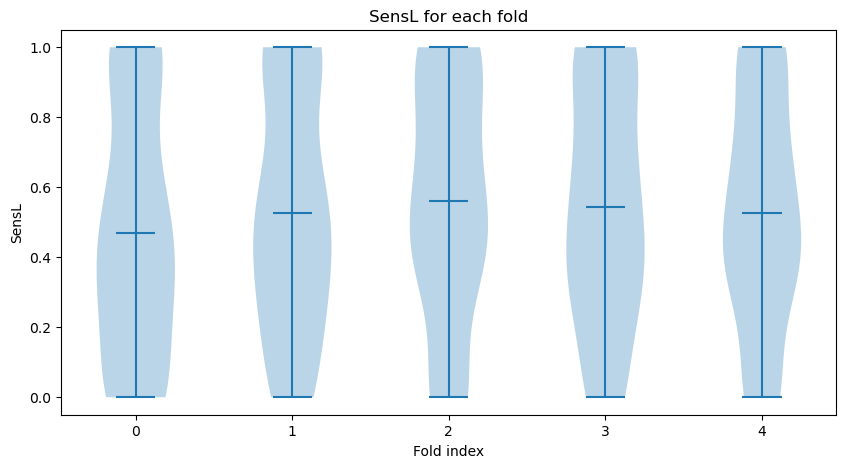

+------------+------+--------+--------------------+
| Fold index | Mean | Median | Standard deviation |
+------------+------+--------+--------------------+
|     0      | 0.47 |  0.4   |        0.36        |
|     1      | 0.53 |  0.5   |        0.34        |
|     2      | 0.56 |  0.5   |        0.34        |
|     3      | 0.54 |  0.5   |        0.34        |
|     4      | 0.53 |  0.5   |        0.33        |
+------------+------+--------+--------------------+


In [7]:
# now we do the same for SensL, Lesion detection sensitivity
SensL = []
for i in range(5):
    SensL.append(metrics[i]['SensL'].dropna())

plt.figure(figsize=(10, 5))
plt.violinplot(SensL, showmeans=True, positions=[0,1,2,3,4])
plt.xlabel('Fold index')
plt.ylabel('SensL')
plt.title('SensL for each fold')
plt.show()

table = PrettyTable()
table.field_names = ['Fold index', 'Mean', 'Median', 'Standard deviation']
for i in range(5):
    table.add_row([i, round(SensL[i].mean(),2), round(SensL[i].median(),2), round(SensL[i].std(),2)])
print(table)

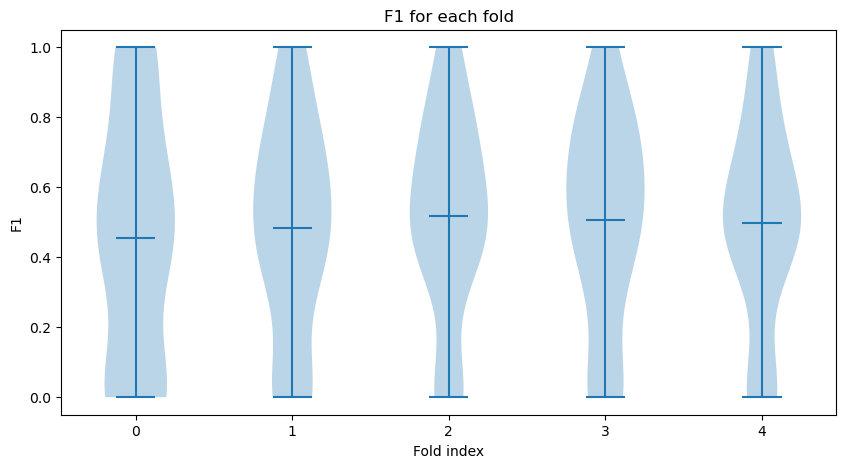

+------------+------+--------+--------------------+
| Fold index | Mean | Median | Standard deviation |
+------------+------+--------+--------------------+
|     0      | 0.45 |  0.45  |        0.35        |
|     1      | 0.48 |  0.5   |        0.3         |
|     2      | 0.52 |  0.53  |        0.29        |
|     3      | 0.51 |  0.53  |        0.3         |
|     4      | 0.5  |  0.5   |        0.29        |
+------------+------+--------+--------------------+


In [8]:
# finally we investigate the F1 score
F1 = []
for i in range(5):
    F1.append(metrics[i]['F1_score'].dropna())

plt.figure(figsize=(10, 5))
plt.violinplot(F1, showmeans=True, positions=[0,1,2,3,4])
plt.xlabel('Fold index')
plt.ylabel('F1')
plt.title('F1 for each fold')
plt.show()

table = PrettyTable()
table.field_names = ['Fold index', 'Mean', 'Median', 'Standard deviation']
for i in range(5):
    table.add_row([i, round(F1[i].mean(),2),round(F1[i].median(),2), round(F1[i].std(),2)])
print(table)

## Contrast specific analysis

In this section we perform the analysis twice: once for STIR and once for PSIR. 

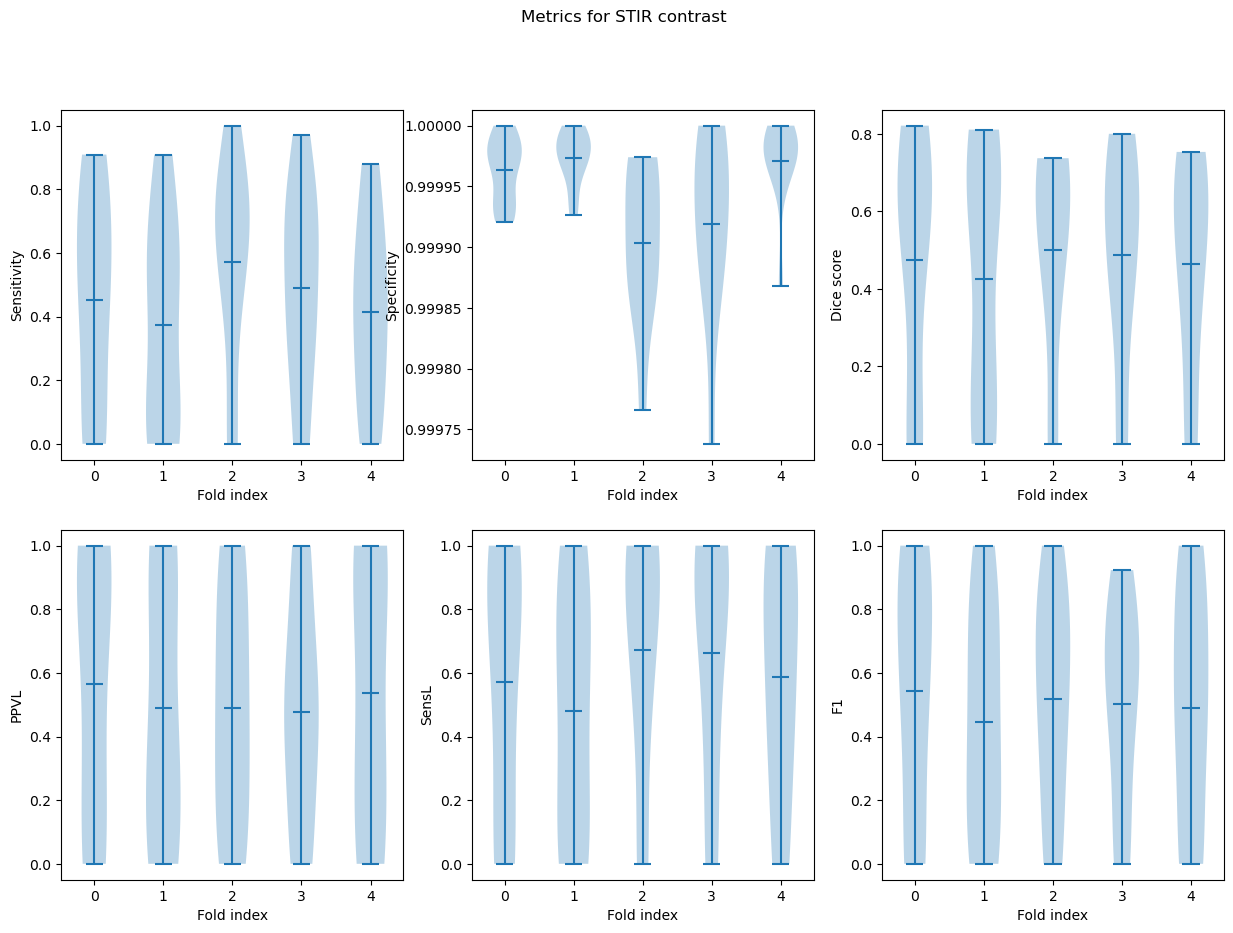

In [9]:
# We create a list : each cell is the sensitivity of a fold where contrast is STIR
sensitivity_stir = []
for i in range(5):
    sensitivity_stir.append(metrics[i]['Sensitivity'][metrics[i]['contrast'] == 'STIR'].dropna())

# same for specificity
specificity_stir = []
for i in range(5):
    specificity_stir.append(metrics[i]['Specificity'][metrics[i]['contrast'] == 'STIR'].dropna())

# same for dice
dice_stir = []
for i in range(5):
    dice_stir.append(metrics[i]['Dice'][metrics[i]['contrast'] == 'STIR'].dropna())

# same for PPVL
PPVL_stir = []
for i in range(5):
    PPVL_stir.append(metrics[i]['PPVL'][metrics[i]['contrast'] == 'STIR'].dropna())

# same for SensL
SensL_stir = []
for i in range(5):
    SensL_stir.append(metrics[i]['SensL'][metrics[i]['contrast'] == 'STIR'].dropna())

# same for F1_score
F1_stir = []
for i in range(5):
    F1_stir.append(metrics[i]['F1_score'][metrics[i]['contrast'] == 'STIR'].dropna())

# we plot everything in a 2x3 plot with violin plots
plt.figure(figsize=(15, 10))
plt.subplot(2,3,1)
plt.violinplot(sensitivity_stir, showmeans=True, positions=[0,1,2,3,4])
plt.xlabel('Fold index')
plt.ylabel('Sensitivity')
plt.subplot(2,3,2)
plt.violinplot(specificity_stir, showmeans=True, positions=[0,1,2,3,4])
plt.xlabel('Fold index')
plt.ylabel('Specificity')
plt.subplot(2,3,3)
plt.violinplot(dice_stir, showmeans=True, positions=[0,1,2,3,4])
plt.xlabel('Fold index')
plt.ylabel('Dice score')
plt.subplot(2,3,4)
plt.violinplot(PPVL_stir, showmeans=True, positions=[0,1,2,3,4])
plt.xlabel('Fold index')
plt.ylabel('PPVL')
plt.subplot(2,3,5)
plt.violinplot(SensL_stir, showmeans=True, positions=[0,1,2,3,4])
plt.xlabel('Fold index')
plt.ylabel('SensL')
plt.subplot(2,3,6)
plt.violinplot(F1_stir, showmeans=True, positions=[0,1,2,3,4])
plt.xlabel('Fold index')
plt.ylabel('F1')
plt.suptitle('Metrics for STIR contrast')
plt.show()

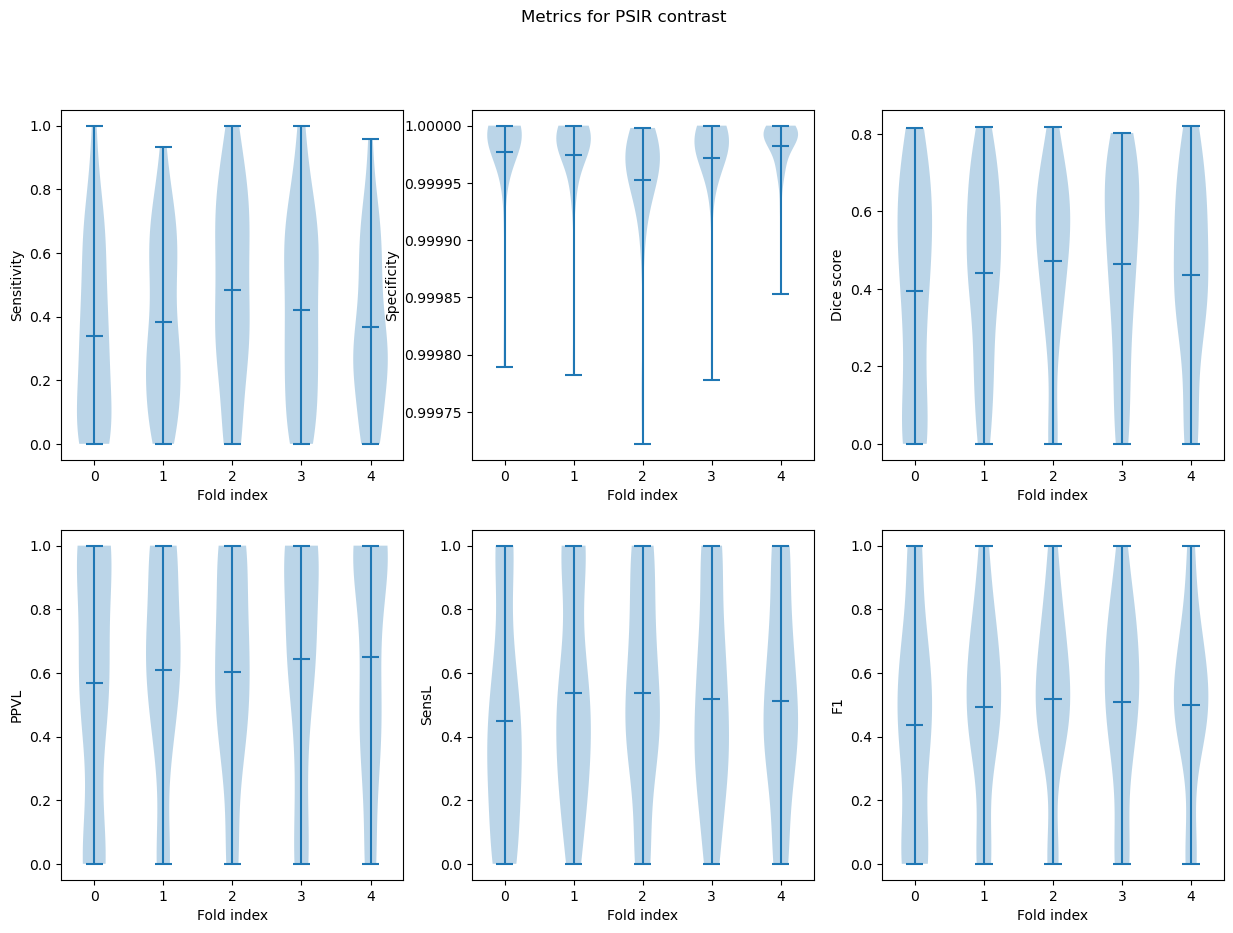

In [10]:
#we do the same for PSIR
# We create a list : each cell is the sensitivity of a fold where contrast is PSIR
sensitivity_psir = []
for i in range(5):
    sensitivity_psir.append(metrics[i]['Sensitivity'][metrics[i]['contrast'] == 'PSIR'].dropna())

# same for specificity
specificity_psir = []
for i in range(5):
    specificity_psir.append(metrics[i]['Specificity'][metrics[i]['contrast'] == 'PSIR'].dropna())

# same for dice
dice_psir = []
for i in range(5):
    dice_psir.append(metrics[i]['Dice'][metrics[i]['contrast'] == 'PSIR'].dropna())

# same for PPVL
PPVL_psir = []
for i in range(5):
    PPVL_psir.append(metrics[i]['PPVL'][metrics[i]['contrast'] == 'PSIR'].dropna())

# same for SensL
SensL_psir = []
for i in range(5):
    SensL_psir.append(metrics[i]['SensL'][metrics[i]['contrast'] == 'PSIR'].dropna())

# same for F1_score
F1_psir = []
for i in range(5):
    F1_psir.append(metrics[i]['F1_score'][metrics[i]['contrast'] == 'PSIR'].dropna())

# we plot everything in a 2x3 plot with violin plots
plt.figure(figsize=(15, 10))
plt.subplot(2,3,1)
plt.violinplot(sensitivity_psir, showmeans=True, positions=[0,1,2,3,4])
plt.xlabel('Fold index')
plt.ylabel('Sensitivity')
plt.subplot(2,3,2)
plt.violinplot(specificity_psir, showmeans=True, positions=[0,1,2,3,4])
plt.xlabel('Fold index')
plt.ylabel('Specificity')
plt.subplot(2,3,3)
plt.violinplot(dice_psir, showmeans=True, positions=[0,1,2,3,4])
plt.xlabel('Fold index')
plt.ylabel('Dice score')
plt.subplot(2,3,4)
plt.violinplot(PPVL_psir, showmeans=True, positions=[0,1,2,3,4])
plt.xlabel('Fold index')
plt.ylabel('PPVL')
plt.subplot(2,3,5)
plt.violinplot(SensL_psir, showmeans=True, positions=[0,1,2,3,4])
plt.xlabel('Fold index')
plt.ylabel('SensL')
plt.subplot(2,3,6)
plt.violinplot(F1_psir, showmeans=True, positions=[0,1,2,3,4])
plt.xlabel('Fold index')
plt.ylabel('F1')
plt.suptitle('Metrics for PSIR contrast')
plt.show()

## Site specific analysis

In this section we look at the results depending on the site of the subject


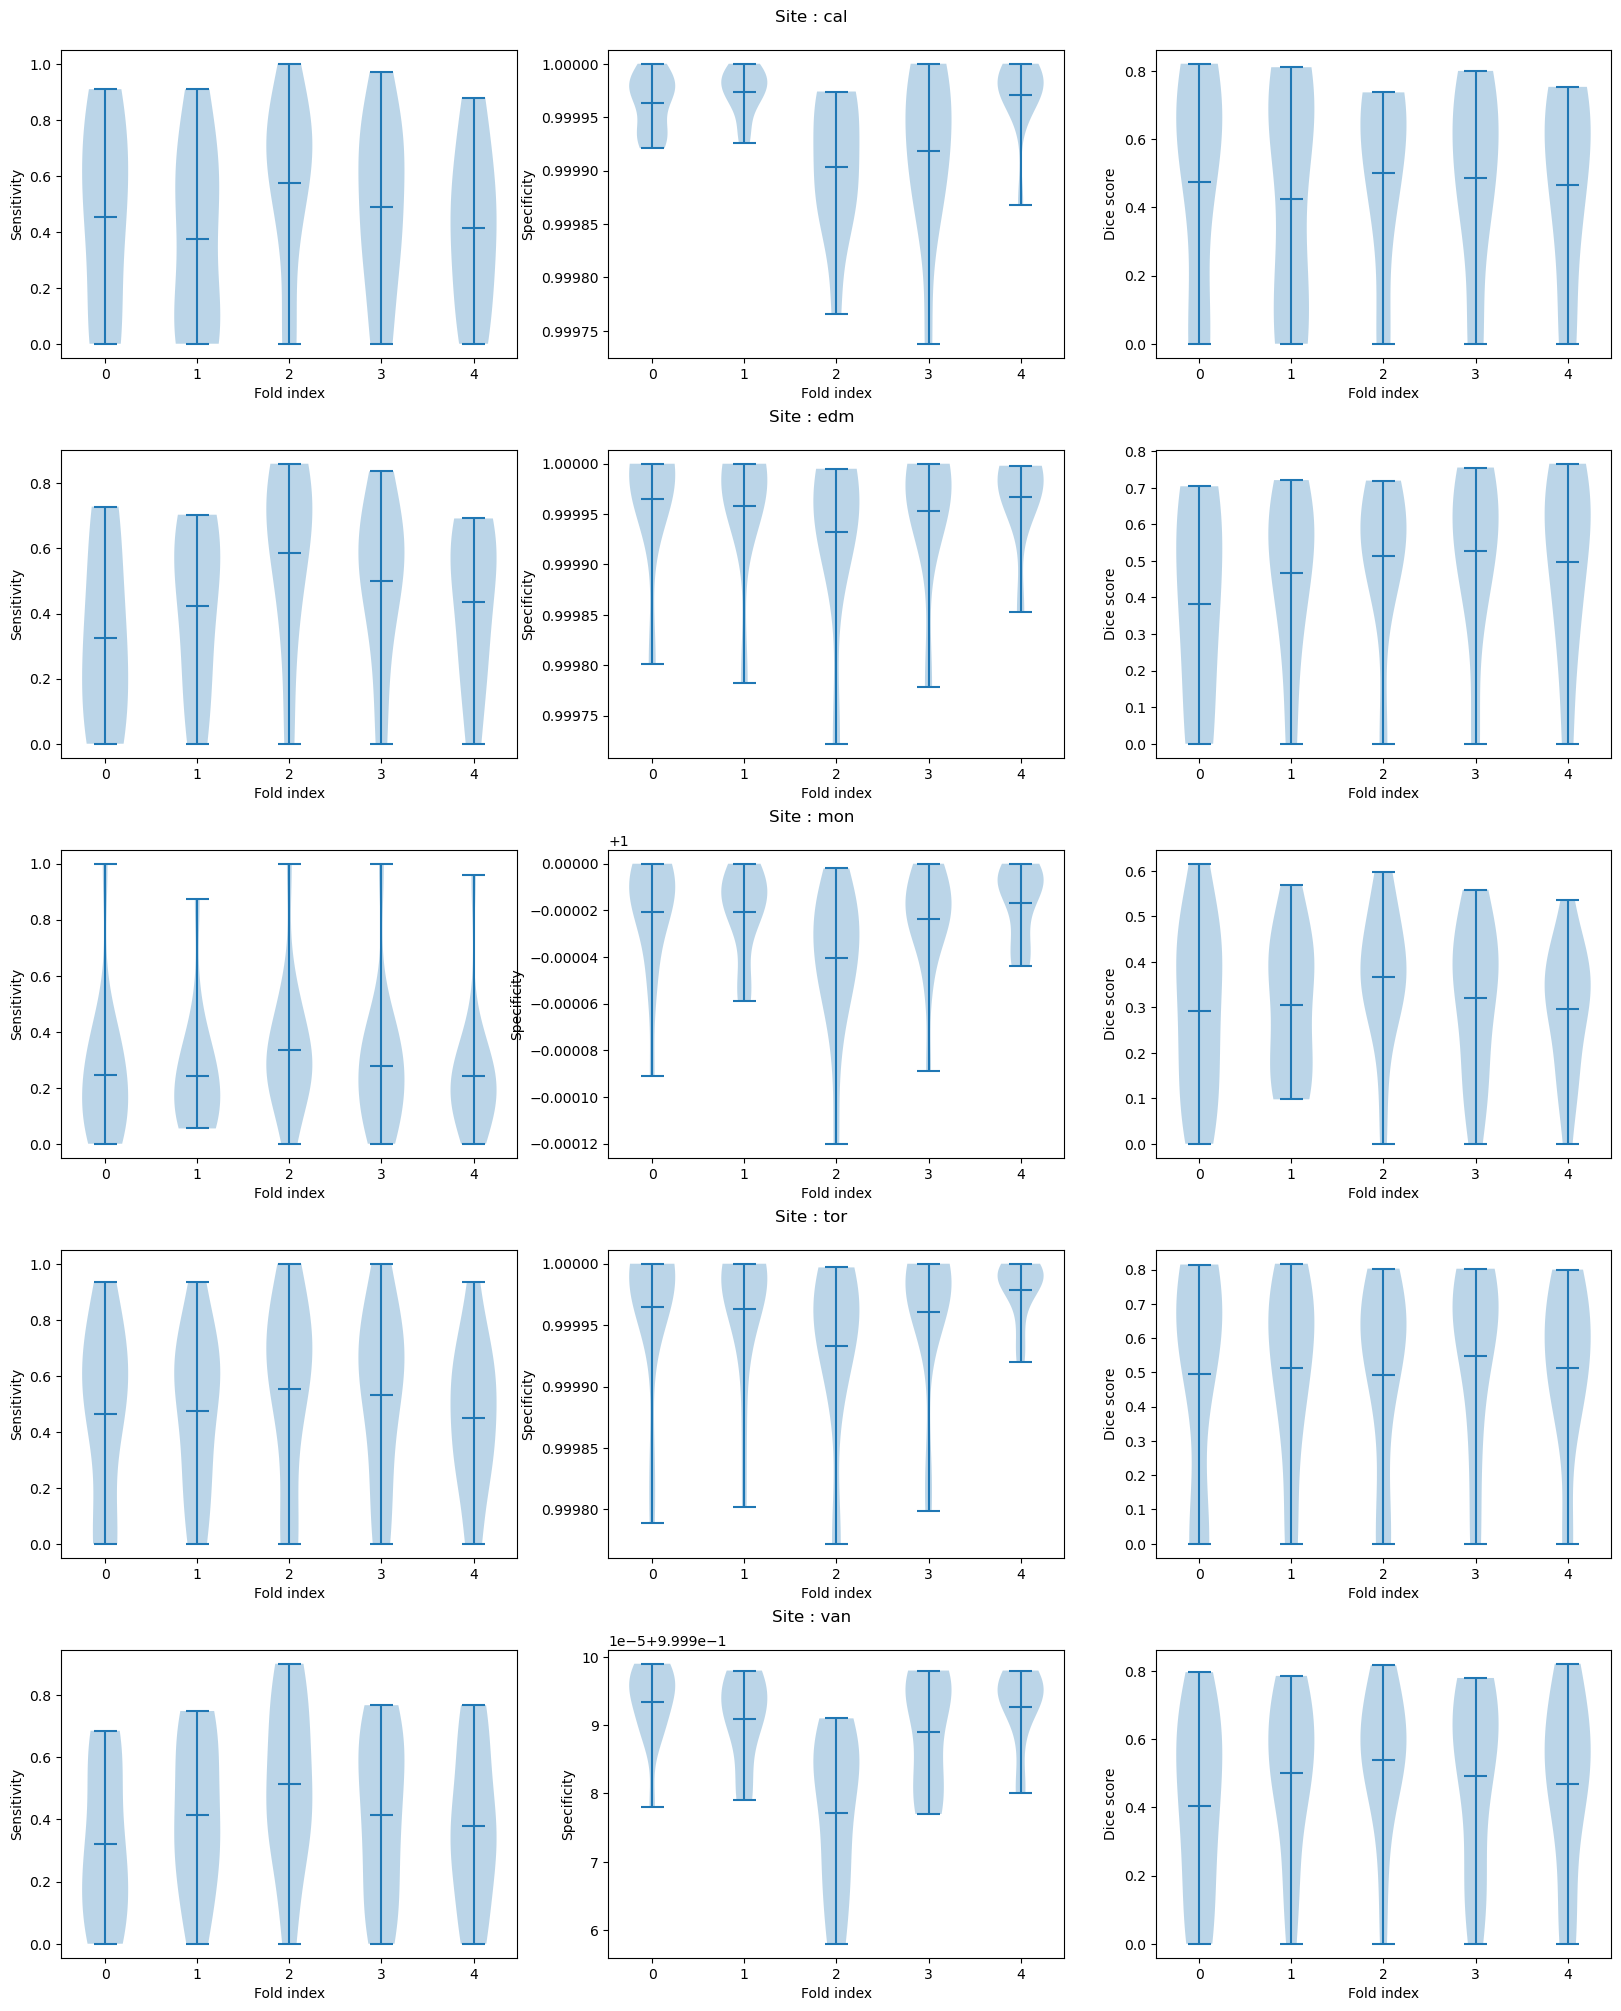

In [11]:
# we look at sensitivity, specificity, dice score for each site and display them on top of each other
sites = np.unique(metrics[0]['site'])  

#we initialize the dictionaries
sensitivity_sites = {}
specificity_sites = {}
dice_sites = {}

#we iterate over the sites
for site in sites:
    sensitivity_sites[site] = []
    specificity_sites[site] = []
    dice_sites[site] = []
    for i in range(5):
        sensitivity_sites[site].append(metrics[i]['Sensitivity'][metrics[i]['site'] == site].dropna())
        specificity_sites[site].append(metrics[i]['Specificity'][metrics[i]['site'] == site].dropna())
        dice_sites[site].append(metrics[i]['Dice'][metrics[i]['site'] == site].dropna())

fig = plt.figure(figsize=(20, 20))
# create 3x1 subfigs
subfigs = fig.subfigures(nrows=len(sites), ncols=1)
for row, subfig in enumerate(subfigs):
    subfig.suptitle(f'Site : {sites[row]}')

    # create 1x3 subplots per subfig
    axs = subfig.subplots(nrows=1, ncols=3)
    for col, ax in enumerate(axs):
        if col == 0:
            ax.violinplot(sensitivity_sites[sites[row]], showmeans=True, positions=[0,1,2,3,4])
            ax.set_ylabel('Sensitivity')
            ax.set_xlabel('Fold index')
            
        if col == 1:
            ax.violinplot(specificity_sites[sites[row]], showmeans=True, positions=[0,1,2,3,4])
            ax.set_ylabel('Specificity')
            ax.set_xlabel('Fold index')
            
        if col == 2:
            ax.violinplot(dice_sites[sites[row]], showmeans=True, positions=[0,1,2,3,4])
            ax.set_ylabel('Dice score')
            ax.set_xlabel('Fold index')
plt.show()
            

# Analysis of 3D nnUNet trained on STIR original images and PSIR multiplied by -1

In this case we look into the 3 most important metrics (F1 score, SensL and PPVL). 

In [12]:
# get path of the 5 datasets of metrics
metrics_mul = []
metrics_mul.append(pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/nnunet_data_mul/test_inference_D222_fold_0_metrics/results.csv'))
metrics_mul.append(pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/nnunet_data_mul/test_inference_D222_fold_1_metrics/results.csv'))
metrics_mul.append(pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/nnunet_data_mul/test_inference_D222_fold_2_metrics/results.csv'))
metrics_mul.append(pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/nnunet_data_mul/test_inference_D222_fold_3_metrics/results.csv'))
metrics_mul.append(pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/nnunet_data_mul/test_inference_D222_fold_4_metrics/results.csv'))

In [13]:
# we look at PPVL
PPVL_mul = []
for i in range(5):
    PPVL_mul.append(metrics_mul[i]['PPVL'].dropna())

# plt.figure(figsize=(10, 5))
# plt.violinplot(PPVL_mul, showmeans=True, positions=[0,1,2,3,4])
# plt.xlabel('Fold index')
# plt.ylabel('PPVL')
# plt.title('PPVL for each fold')
# plt.show()

table = PrettyTable()
table.field_names = ['Fold index', 'Mean', 'Median', 'Standard deviation']
for i in range(5):
    table.add_row([i, round(PPVL_mul[i].mean(),2), round(PPVL_mul[i].median(),2), round(PPVL_mul[i].std(),2)])
print(table)

#then we look ath SensL
SensL_mul = []
for i in range(5):
    SensL_mul.append(metrics_mul[i]['SensL'].dropna())

# plt.figure(figsize=(10, 5))
# plt.violinplot(SensL_mul, showmeans=True, positions=[0,1,2,3,4])
# plt.xlabel('Fold index')
# plt.ylabel('SensL')
# plt.title('SensL for each fold')
# plt.show()

table = PrettyTable()
table.field_names = ['Fold index', 'Mean', 'Median', 'Standard deviation']
for i in range(5):
    table.add_row([i, round(SensL_mul[i].mean(),2), round(SensL_mul[i].median(),2), round(SensL_mul[i].std(),2)])
print(table)

# and finally F1_score
F1_mul = []
for i in range(5):
    F1_mul.append(metrics_mul[i]['F1_score'].dropna())

# plt.figure(figsize=(10, 5))
# plt.violinplot(F1_mul, showmeans=True, positions=[0,1,2,3,4])
# plt.xlabel('Fold index')
# plt.ylabel('F1')
# plt.title('F1 for each fold')
# plt.show()

table = PrettyTable()
table.field_names = ['Fold index', 'Mean', 'Median', 'Standard deviation']
for i in range(5):
    table.add_row([i, round(F1_mul[i].mean(),2), round(F1_mul[i].median(),2), round(F1_mul[i].std(),2)])
print(table)

#we look at the RelativeVolumeError
RelativeVolumeError_mul = []
for i in range(5):
    RelativeVolumeError_mul.append(metrics_mul[i]['RelativeVolumeError'].dropna())

# plt.figure(figsize=(10, 5))
# plt.violinplot(RelativeVolumeError_mul, showmeans=True, positions=[0,1,2,3,4])
# plt.xlabel('Fold index')
# plt.ylabel('RelativeVolumeError')
# plt.title('RelativeVolumeError for each fold')
# plt.show()

table = PrettyTable()
table.field_names = ['Fold index', 'Mean RelativeVolumeError', 'Median RelativeVolumeError', 'RelativeVolumeError Standard deviation']
for i in range(5):
    table.add_row([i, round(RelativeVolumeError_mul[i].mean(),2), round(RelativeVolumeError_mul[i].median(),2), round(RelativeVolumeError_mul[i].std(),2)])
print(table)

#we look at the Dice
dice_mul = []
for i in range(5):
    dice_mul.append(metrics_mul[i]['Dice'].dropna())

# plt.figure(figsize=(10, 5))
# plt.violinplot(dice_mul, showmeans=True, positions=[0,1,2,3,4])
# plt.xlabel('Fold index')
# plt.ylabel('Dice')
# plt.title('Dice for each fold')
# plt.show()

table = PrettyTable()
table.field_names = ['Fold index', 'Mean Dice', 'Median Dice', 'Dice Standard deviation']
for i in range(5):
    table.add_row([i, round(dice_mul[i].mean(),2), round(dice_mul[i].median(),2), round(dice_mul[i].std(),2)])
print(table)

+------------+------+--------+--------------------+
| Fold index | Mean | Median | Standard deviation |
+------------+------+--------+--------------------+
|     0      | 0.58 |  0.67  |        0.39        |
|     1      | 0.62 |  0.75  |        0.37        |
|     2      | 0.63 |  0.67  |        0.33        |
|     3      | 0.61 |  0.67  |        0.35        |
|     4      | 0.66 |  0.8   |        0.36        |
+------------+------+--------+--------------------+
+------------+------+--------+--------------------+
| Fold index | Mean | Median | Standard deviation |
+------------+------+--------+--------------------+
|     0      | 0.45 |  0.4   |        0.37        |
|     1      | 0.53 |  0.5   |        0.32        |
|     2      | 0.57 |  0.5   |        0.34        |
|     3      | 0.52 |  0.5   |        0.34        |
|     4      | 0.48 |  0.5   |        0.32        |
+------------+------+--------+--------------------+
+------------+------+--------+--------------------+
| Fold index

# Comparison of best fold from first and second model

- The best fold in the first model is fold 2. 
- The best fold in the second model is fold 2 as well. 

We now compare these two folds : 

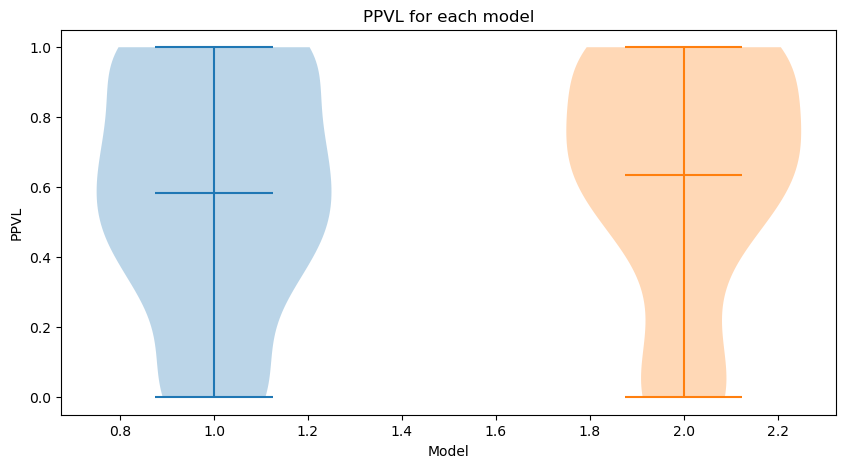

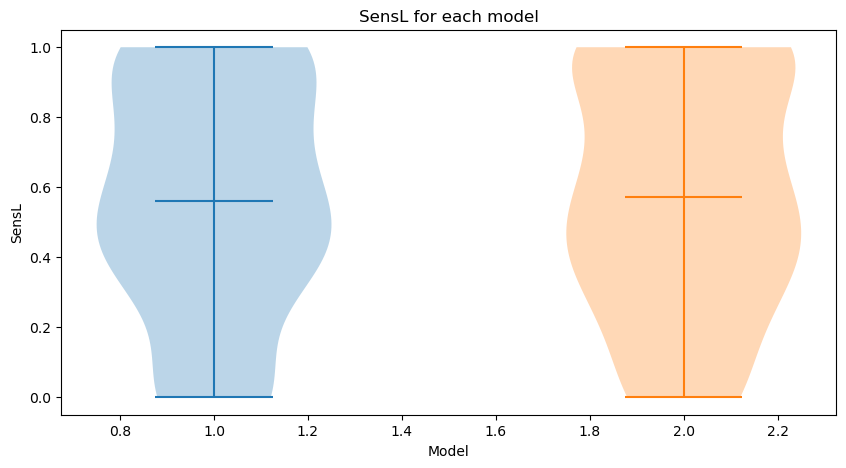

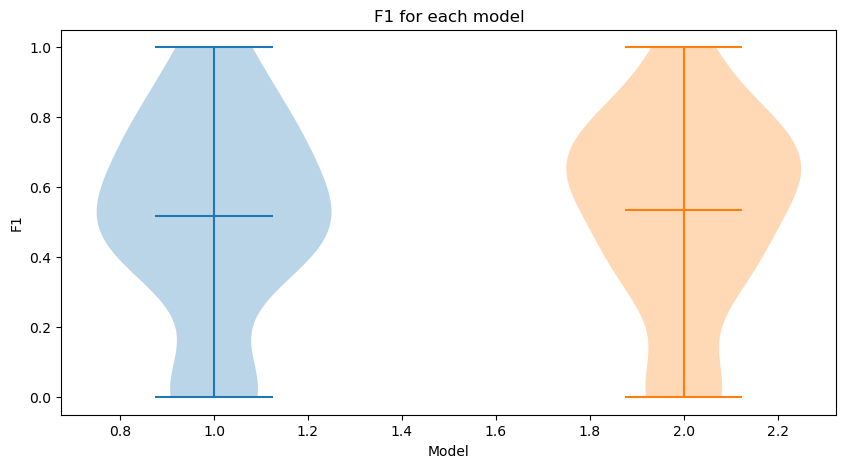

+-------------+----------------+----------------+
| Metric mean | Model 1 fold 2 | Model 2 fold 2 |
+-------------+----------------+----------------+
|     PPVL    |      0.58      |      0.63      |
|    SensL    |      0.56      |      0.57      |
|      F1     |      0.52      |      0.53      |
+-------------+----------------+----------------+


In [14]:
# we look at PPVL, SsnsL and F1 for model 1 fold 2 and model 2 fold 2. 
#we plot the violin plots on top of each other
plt.figure(figsize=(10, 5))
plt.violinplot(PPVL[2], showmeans=True, positions=[1])
plt.violinplot(PPVL_mul[2], showmeans=True, positions=[2])
plt.xlabel('Model')
plt.ylabel('PPVL')
plt.title('PPVL for each model')
plt.show()

plt.figure(figsize=(10, 5))
plt.violinplot(SensL[2], showmeans=True, positions=[1])
plt.violinplot(SensL_mul[2], showmeans=True, positions=[2])
plt.xlabel('Model')
plt.ylabel('SensL')
plt.title('SensL for each model')
plt.show()

plt.figure(figsize=(10, 5))
plt.violinplot(F1[2], showmeans=True, positions=[1])
plt.violinplot(F1_mul[2], showmeans=True, positions=[2])
plt.xlabel('Model')
plt.ylabel('F1')
plt.title('F1 for each model')
plt.show()

#we sum up everthing in a table
table = PrettyTable()
table.field_names = ['Metric mean', 'Model 1 fold 2', 'Model 2 fold 2']
table.add_row(['PPVL', round(PPVL[2].mean(),2), round(PPVL_mul[2].mean(),2)])
table.add_row(['SensL', round(SensL[2].mean(),2), round(SensL_mul[2].mean(),2)])
table.add_row(['F1', round(F1[2].mean(),2), round(F1_mul[2].mean(),2)])
print(table)




# Comparison with best folds and 2d nnUNet models' folds

In this section we compare the performances of the folds of the 2D nnUNet trained on original STIR and PSIR images and the 2D nnUNet trained on STIR and multiplied by -1 PSIR images

### For 2d nnUNet on STIR and PSIR

In [15]:
# get path of the 5 datasets of metrics
metrics_2d = []
metrics_2d.append(pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/nnunet_data/test_inference_D111_fold_0_2d_metrics/results.csv'))
metrics_2d.append(pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/nnunet_data/test_inference_D111_fold_1_2d_metrics/results.csv'))
metrics_2d.append(pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/nnunet_data/test_inference_D111_fold_2_2d_metrics/results.csv'))
metrics_2d.append(pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/nnunet_data/test_inference_D111_fold_3_2d_metrics/results.csv'))
metrics_2d.append(pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/nnunet_data/test_inference_D111_fold_4_2d_metrics/results.csv'))

# we look at PPVL
PPVL_2d = []
for i in range(5):
    PPVL_2d.append(metrics_2d[i]['PPVL'].dropna())

# plt.figure(figsize=(10, 5))
# plt.violinplot(PPVL_2d, showmeans=True, positions=[0,1,2,3,4])
# plt.xlabel('Fold index')
# plt.ylabel('PPVL')
# plt.title('PPVL for each fold')
# plt.show()

table = PrettyTable()
table.field_names = ['Fold index', 'Mean PPVL', 'Median PPVL', 'PPVL Standard deviation']
for i in range(5):
    table.add_row([i, round(PPVL_2d[i].mean(),2), round(PPVL_2d[i].median(),2), round(PPVL_2d[i].std(),2)])
print(table)

#then we look ath SensL
SensL_2d = []
for i in range(5):
    SensL_2d.append(metrics_2d[i]['SensL'].dropna())

# plt.figure(figsize=(10, 5))
# plt.violinplot(SensL_2d, showmeans=True, positions=[0,1,2,3,4])
# plt.xlabel('Fold index')
# plt.ylabel('SensL')
# plt.title('SensL for each fold')
# plt.show()

table = PrettyTable()
table.field_names = ['Fold index', 'Mean SensL', 'Median SensL', 'SensL Standard deviation']
for i in range(5):
    table.add_row([i, round(SensL_2d[i].mean(),2), round(SensL_2d[i].median(),2), round(SensL_2d[i].std(),2)])
print(table)

# and finally F1_score
F1_2d = []
for i in range(5):
    F1_2d.append(metrics_2d[i]['F1_score'].dropna())

# plt.figure(figsize=(10, 5))
# plt.violinplot(F1_2d, showmeans=True, positions=[0,1,2,3,4])
# plt.xlabel('Fold index')
# plt.ylabel('F1')
# plt.title('F1 for each fold')
# plt.show()

table = PrettyTable()
table.field_names = ['Fold index', 'Mean F1', 'Median F1', 'F1 Standard deviation']
for i in range(5):
    table.add_row([i, round(F1_2d[i].mean(),2), round(F1_2d[i].median(),2), round(F1_2d[i].std(),2)])
print(table)

+------------+-----------+-------------+-------------------------+
| Fold index | Mean PPVL | Median PPVL | PPVL Standard deviation |
+------------+-----------+-------------+-------------------------+
|     0      |    0.56   |     0.67    |           0.39          |
|     1      |    0.62   |     0.75    |           0.4           |
|     2      |    0.62   |     0.67    |           0.36          |
|     3      |    0.59   |     0.67    |           0.4           |
|     4      |    0.59   |     0.67    |           0.39          |
+------------+-----------+-------------+-------------------------+
+------------+------------+--------------+--------------------------+
| Fold index | Mean SensL | Median SensL | SensL Standard deviation |
+------------+------------+--------------+--------------------------+
|     0      |    0.48    |     0.4      |           0.36           |
|     1      |    0.49    |     0.47     |           0.35           |
|     2      |    0.55    |     0.5      |     

We identify that the best fold is : 


### For 2D nnUNet trained on STIR and multiplied by -1 PSIR

In [16]:
# get path of the 5 datasets of metrics
metrics_2d_mul = []
metrics_2d_mul.append(pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/nnunet_data_mul/test_inference_D222_fold_0_2d_metrics/results.csv'))
metrics_2d_mul.append(pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/nnunet_data_mul/test_inference_D222_fold_1_2d_metrics/results.csv'))
metrics_2d_mul.append(pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/nnunet_data_mul/test_inference_D222_fold_2_2d_metrics/results.csv'))
metrics_2d_mul.append(pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/nnunet_data_mul/test_inference_D222_fold_3_2d_metrics/results.csv'))
metrics_2d_mul.append(pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/nnunet_data_mul/test_inference_D222_fold_4_2d_metrics/results.csv'))

# we look at PPVL
PPVL_2d_mul = []
for i in range(5):
    PPVL_2d_mul.append(metrics_2d_mul[i]['PPVL'].dropna())

# plt.figure(figsize=(10, 5))
# plt.violinplot(PPVL_2d, showmeans=True, positions=[0,1,2,3,4])
# plt.xlabel('Fold index')
# plt.ylabel('PPVL')
# plt.title('PPVL for each fold')
# plt.show()

table = PrettyTable()
table.field_names = ['Fold index', 'Mean PPVL', 'Median PPVL', 'PPVL Standard deviation']
for i in range(5):
    table.add_row([i, round(PPVL_2d_mul[i].mean(),2), round(PPVL_2d_mul[i].median(),2), round(PPVL_2d_mul[i].std(),2)])
print(table)

#then we look ath SensL
SensL_2d_mul = []
for i in range(5):
    SensL_2d_mul.append(metrics_2d_mul[i]['SensL'].dropna())

# plt.figure(figsize=(10, 5))
# plt.violinplot(SensL_2d, showmeans=True, positions=[0,1,2,3,4])
# plt.xlabel('Fold index')
# plt.ylabel('SensL')
# plt.title('SensL for each fold')
# plt.show()

table = PrettyTable()
table.field_names = ['Fold index', 'Mean SensL', 'Median SensL', 'SensL Standard deviation']
for i in range(5):
    table.add_row([i, round(SensL_2d_mul[i].mean(),2), round(SensL_2d_mul[i].median(),2), round(SensL_2d_mul[i].std(),2)])
print(table)

# and finally F1_score
F1_2d_mul = []
for i in range(5):
    F1_2d_mul.append(metrics_2d_mul[i]['F1_score'].dropna())

# plt.figure(figsize=(10, 5))
# plt.violinplot(F1_2d, showmeans=True, positions=[0,1,2,3,4])
# plt.xlabel('Fold index')
# plt.ylabel('F1')
# plt.title('F1 for each fold')
# plt.show()

table = PrettyTable()
table.field_names = ['Fold index', 'Mean F1', 'Median F1', 'F1 Standard deviation']
for i in range(5):
    table.add_row([i, round(F1_2d_mul[i].mean(),2), round(F1_2d_mul[i].median(),2), round(F1_2d_mul[i].std(),2)])
print(table)

#we look at the RelativeVolumeError
RelativeVolumeError_2d_mul = []
for i in range(5):
    RelativeVolumeError_2d_mul.append(metrics_2d_mul[i]['RelativeVolumeError'].dropna())

# plt.figure(figsize=(10, 5))
# plt.violinplot(RelativeVolumeError_2d_mul, showmeans=True, positions=[0,1,2,3,4])
# plt.xlabel('Fold index')
# plt.ylabel('RelativeVolumeError')
# plt.title('RelativeVolumeError for each fold')
# plt.show()

table = PrettyTable()
table.field_names = ['Fold index', 'Mean RelativeVolumeError', 'Median RelativeVolumeError', 'RelativeVolumeError Standard deviation']
for i in range(5):
    table.add_row([i, round(RelativeVolumeError_2d_mul[i].mean(),2), round(RelativeVolumeError_2d_mul[i].median(),2), round(RelativeVolumeError_2d_mul[i].std(),2)])
print(table)

#we look at the Dice
dice_2d_mul = []
for i in range(5):
    dice_2d_mul.append(metrics_2d_mul[i]['Dice'].dropna())

# plt.figure(figsize=(10, 5))
# plt.violinplot(RelativeVolumeError_2d_mul, showmeans=True, positions=[0,1,2,3,4])
# plt.xlabel('Fold index')
# plt.ylabel('RelativeVolumeError')
# plt.title('RelativeVolumeError for each fold')
# plt.show()

table = PrettyTable()
table.field_names = ['Fold index', 'Mean Dice', 'Median Dice', 'Dice Standard deviation']
for i in range(5):
    table.add_row([i, round(dice_2d_mul[i].mean(),2), round(dice_2d_mul[i].median(),2), round(dice_2d_mul[i].std(),2)])
print(table)

+------------+-----------+-------------+-------------------------+
| Fold index | Mean PPVL | Median PPVL | PPVL Standard deviation |
+------------+-----------+-------------+-------------------------+
|     0      |    0.63   |     0.67    |           0.36          |
|     1      |    0.6    |     0.67    |           0.38          |
|     2      |    0.64   |     0.7     |           0.37          |
|     3      |    0.6    |     0.67    |           0.36          |
|     4      |    0.6    |     0.75    |           0.42          |
+------------+-----------+-------------+-------------------------+
+------------+------------+--------------+--------------------------+
| Fold index | Mean SensL | Median SensL | SensL Standard deviation |
+------------+------------+--------------+--------------------------+
|     0      |    0.57    |     0.5      |           0.36           |
|     1      |    0.5     |     0.5      |           0.36           |
|     2      |    0.58    |     0.5      |     

# Comparison of best folds from the 3D model and 2D model both trained on STIR and multiplied by -1 PSIR

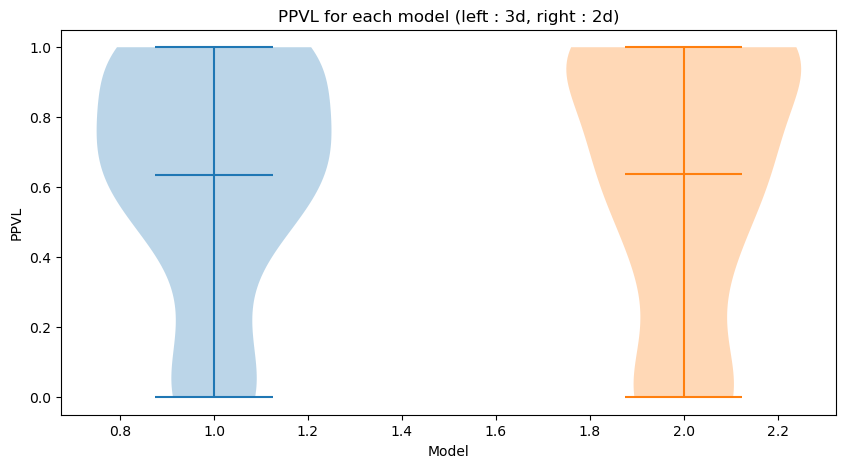

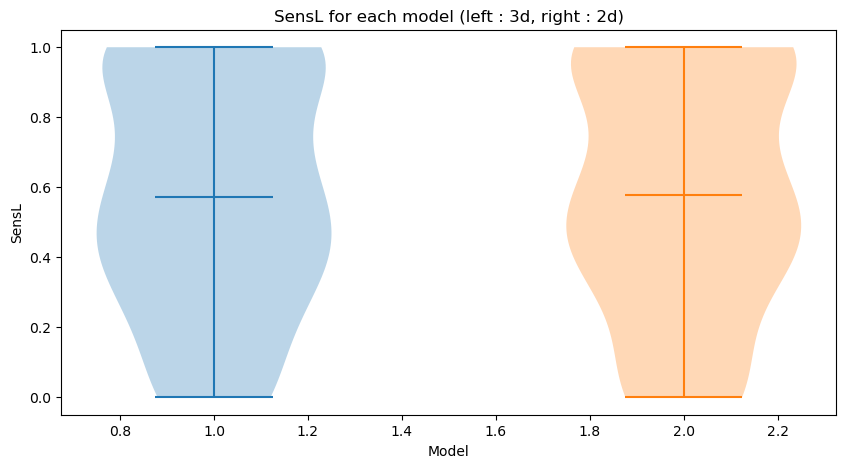

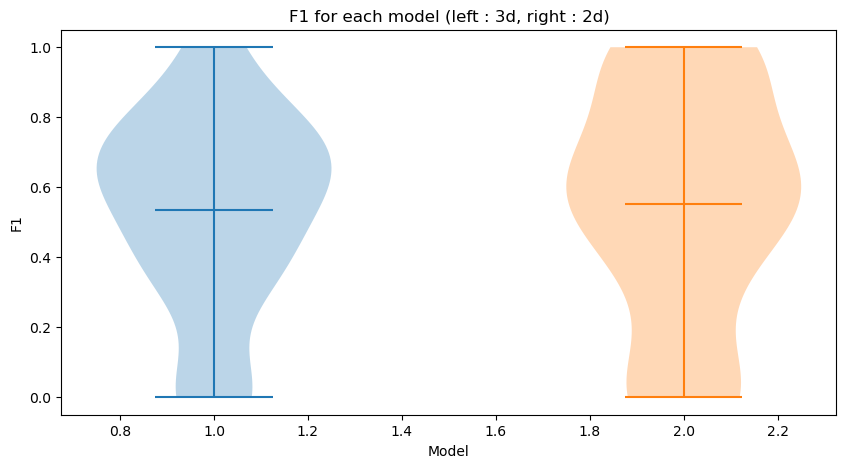

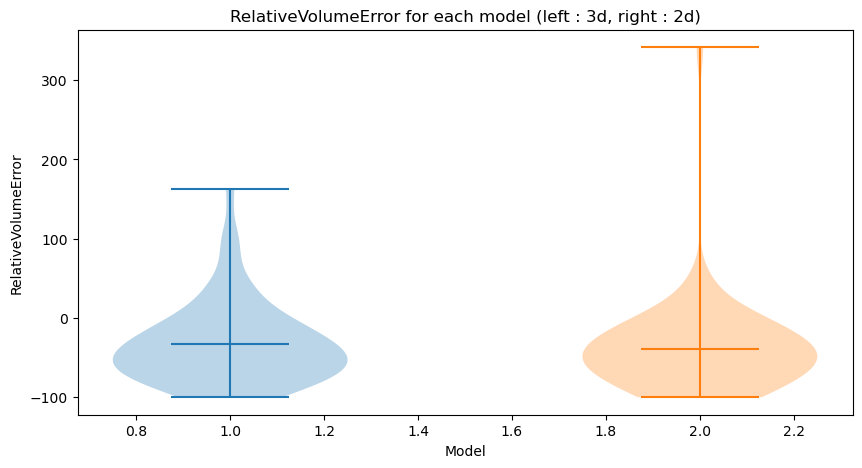

+------------------------------------+-------------------------+------------------------+
|            Metric mean             |   Model 3d_mul fold 2   |  Model 2d_mul fold 2   |
+------------------------------------+-------------------------+------------------------+
|        PPVL (median | std)         |    0.63 (0.67 | 0.33)   |   0.64 (0.7 | 0.37)    |
|        SensL (median | std)        |    0.57 (0.5 | 0.34)    |   0.58 (0.5 | 0.35)    |
|         F1 (median | std)          |    0.53 (0.57 | 0.28)   |   0.55 (0.57 | 0.33)   |
| RelativeVolumeError (median | std) | -32.57 (-44.59 | 51.05) | -39.03 (-46.81 | 60.3) |
+------------------------------------+-------------------------+------------------------+


In [17]:
# we look at PPVL, SsnsL and F1 for model 1 fold 2 and model 2 fold 2. 
#we plot the violin plots on top of each other
plt.figure(figsize=(10, 5))
plt.violinplot(PPVL_mul[2], showmeans=True, positions=[1])
plt.violinplot(PPVL_2d_mul[2], showmeans=True, positions=[2])

plt.xlabel('Model')
plt.ylabel('PPVL')
plt.title('PPVL for each model (left : 3d, right : 2d)')
plt.show()

plt.figure(figsize=(10, 5))
plt.violinplot(SensL_mul[2], showmeans=True, positions=[1])
plt.violinplot(SensL_2d_mul[2], showmeans=True, positions=[2])
plt.xlabel('Model')
plt.ylabel('SensL')
plt.title('SensL for each model (left : 3d, right : 2d)')
plt.show()

plt.figure(figsize=(10, 5))
plt.violinplot(F1_mul[2], showmeans=True, positions=[1])
plt.violinplot(F1_2d_mul[2], showmeans=True, positions=[2])
plt.xlabel('Model')
plt.ylabel('F1')
plt.title('F1 for each model (left : 3d, right : 2d)')
plt.show()

plt.figure(figsize=(10, 5))
plt.violinplot(RelativeVolumeError_mul[2], showmeans=True, positions=[1])
plt.violinplot(RelativeVolumeError_2d_mul[2], showmeans=True, positions=[2])
plt.xlabel('Model')
plt.ylabel('RelativeVolumeError')
plt.title('RelativeVolumeError for each model (left : 3d, right : 2d)')
plt.show()


#we sum up everthing in a table
table = PrettyTable()
table.field_names = ['Metric mean', 'Model 3d_mul fold 2', 'Model 2d_mul fold 2']
table.add_row(['PPVL (median | std)', str(round(PPVL_mul[2].mean(),2)) + " ("+ str(round(PPVL_mul[2].median(),2)) + " | " + str(round(PPVL_mul[2].std(),2)) + ")",
                str(round(PPVL_2d_mul[2].mean(),2)) + " ("+ str(round(PPVL_2d_mul[2].median(),2)) + " | " + str(round(PPVL_2d_mul[2].std(),2)) + ")"])
table.add_row(['SensL (median | std)', str(round(SensL_mul[2].mean(),2)) + " ("+ str(round(SensL_mul[2].median(),2)) + " | " + str(round(SensL_mul[2].std(),2)) + ")",
                str(round(SensL_2d_mul[2].mean(),2)) + " ("+ str(round(SensL_2d_mul[2].median(),2)) + " | " + str(round(SensL_2d_mul[2].std(),2)) + ")"])
table.add_row(['F1 (median | std)', str(round(F1_mul[2].mean(),2)) + " ("+ str(round(F1_mul[2].median(),2)) + " | " + str(round(F1_mul[2].std(),2)) + ")",
                str(round(F1_2d_mul[2].mean(),2)) + " ("+ str(round(F1_2d_mul[2].median(),2)) + " | " + str(round(F1_2d_mul[2].std(),2)) + ")"])
table.add_row(['RelativeVolumeError (median | std)', str(round(RelativeVolumeError_mul[2].mean(),2)) + " ("+ str(round(RelativeVolumeError_mul[2].median(),2)) + " | " + str(round(RelativeVolumeError_mul[2].std(),2)) + ")",
                str(round(RelativeVolumeError_2d_mul[2].mean(),2)) + " ("+ str(round(RelativeVolumeError_2d_mul[2].median(),2)) + " | " + str(round(RelativeVolumeError_2d_mul[2].std(),2)) + ")"])
print(table)


# Comparison of two previous model with sct_deepseg_lesion

In this section we compare: 
- the 3d nnUNet model trained on STIR and inversed PSIR
- the 2d nnUNet model trained on STIR and inversed PSIR
- the sct_deepseg_lesion model

In [18]:
metrics_sct = pd.read_csv('/Users/plbenveniste/tmp_romane/canproco/project/canproco_final/inference_sct_deepseg_lesion/inference_results_sct_deepseg_lesion_BIDS_metrics/results.csv')

# we look at PPVL
PPVL_sct = metrics_sct['PPVL'].dropna()

#then we look ath SensL
SensL_sct = metrics_sct['SensL'].dropna()

# and finally F1_score
F1_sct = metrics_sct['F1_score'].dropna()

#we look at the RelativeVolumeError
RelativeVolumeError_sct = metrics_sct['RelativeVolumeError'].dropna()

#dice 
dice_sct = metrics_sct['Dice'].dropna()

#we sum up everthing in a table
table = PrettyTable()
table.field_names = ['Metric mean', 'Model 3d_mul fold 2', 'Model 2d_mul fold 2', 'sct_deepseg_lesion']
table.add_row(['PPVL (median | std)', str(round(PPVL_mul[2].mean(),2)) + " ("+ str(round(PPVL_mul[2].median(),2)) + " | " + str(round(PPVL_mul[2].std(),2)) + ")",
                str(round(PPVL_2d_mul[2].mean(),2)) + " ("+ str(round(PPVL_2d_mul[2].median(),2)) + " | " + str(round(PPVL_2d_mul[2].std(),2)) + ")", 
                str(round(PPVL_sct.mean(),2)) + " ("+ str(round(PPVL_sct.median(),2)) + " | " + str(round(PPVL_sct.std(),2)) + ")"])
table.add_row(['SensL (median | std)', str(round(SensL_mul[2].mean(),2)) + " ("+ str(round(SensL_mul[2].median(),2)) + " | " + str(round(SensL_mul[2].std(),2)) + ")",
                str(round(SensL_2d_mul[2].mean(),2)) + " ("+ str(round(SensL_2d_mul[2].median(),2)) + " | " + str(round(SensL_2d_mul[2].std(),2)) + ")",
                str(round(SensL_sct.mean(),2)) + " ("+ str(round(SensL_sct.median(),2)) + " | " + str(round(SensL_sct.std(),2)) + ")"])
table.add_row(['F1 (median | std)', str(round(F1_mul[2].mean(),2)) + " ("+ str(round(F1_mul[2].median(),2)) + " | " + str(round(F1_mul[2].std(),2)) + ")",
                str(round(F1_2d_mul[2].mean(),2)) + " ("+ str(round(F1_2d_mul[2].median(),2)) + " | " + str(round(F1_sct.std(),2)) + ")",
                str(round(F1_sct.mean(),2)) + " ("+ str(round(F1_sct.median(),2)) + " | " + str(round(F1_sct.std(),2)) + ")"])
table.add_row(['RelativeVolumeError (median | std)', str(round(RelativeVolumeError_mul[2].mean(),2)) + " ("+ str(round(RelativeVolumeError_mul[2].median(),2)) + " | " + str(round(RelativeVolumeError_mul[2].std(),2)) + ")",
                str(round(RelativeVolumeError_2d_mul[2].mean(),2)) + " ("+ str(round(RelativeVolumeError_2d_mul[2].median(),2)) + " | " + str(round(RelativeVolumeError_2d_mul[2].std(),2)) + ")",
                str(round(RelativeVolumeError_sct.mean(),2)) + " ("+ str(round(RelativeVolumeError_sct.median(),2)) + " | " + str(round(RelativeVolumeError_sct.std(),2)) + ")"])
table.add_row(['Dice (median | std)', str(round(dice_mul[2].mean(),2)) + " ("+ str(round(dice_mul[2].median(),2)) + " | " + str(round(dice_mul[2].std(),2)) + ")",
                str(round(dice_2d_mul[2].mean(),2)) + " ("+ str(round(dice_2d_mul[2].median(),2)) + " | " + str(round(dice_2d_mul[2].std(),2)) + ")",
                str(round(dice_sct.mean(),2)) + " ("+ str(round(dice_sct.median(),2)) + " | " + str(round(dice_sct.std(),2)) + ")"])
print(table)


+------------------------------------+-------------------------+------------------------+------------------------+
|            Metric mean             |   Model 3d_mul fold 2   |  Model 2d_mul fold 2   |   sct_deepseg_lesion   |
+------------------------------------+-------------------------+------------------------+------------------------+
|        PPVL (median | std)         |    0.63 (0.67 | 0.33)   |   0.64 (0.7 | 0.37)    |   0.35 (0.33 | 0.31)   |
|        SensL (median | std)        |    0.57 (0.5 | 0.34)    |   0.58 (0.5 | 0.35)    |   0.37 (0.33 | 0.34)   |
|         F1 (median | std)          |    0.53 (0.57 | 0.28)   |   0.55 (0.57 | 0.28)   |   0.31 (0.29 | 0.28)   |
| RelativeVolumeError (median | std) | -32.57 (-44.59 | 51.05) | -39.03 (-46.81 | 60.3) | 67.98 (16.54 | 218.97) |
|        Dice (median | std)         |    0.46 (0.53 | 0.25)   |   0.47 (0.55 | 0.27)   |   0.32 (0.35 | 0.21)   |
+------------------------------------+-------------------------+----------------

In [19]:
df1 = metrics_mul[2].copy()
df1['method']='3d nnUNet'
df2 = metrics_2d_mul[2].copy()
df2['method']='2d nnUNet'
df3 = metrics_sct.copy()
df3['method']='sct_deepseg_lesion'

df123 = pd.concat([df1, df2, df3])

#we rename the columns
df123 = df123.rename(columns={'method': 'Method', 'site': 'Site', 'PPVL': 'Positive Predictive Value for Lesions', 'SensL': 'Lesion Sensitivity', 'F1_score': 'F1 score', 'RelativeVolumeError': 'Relative Volume Error', 'contrast': 'Contrast'})

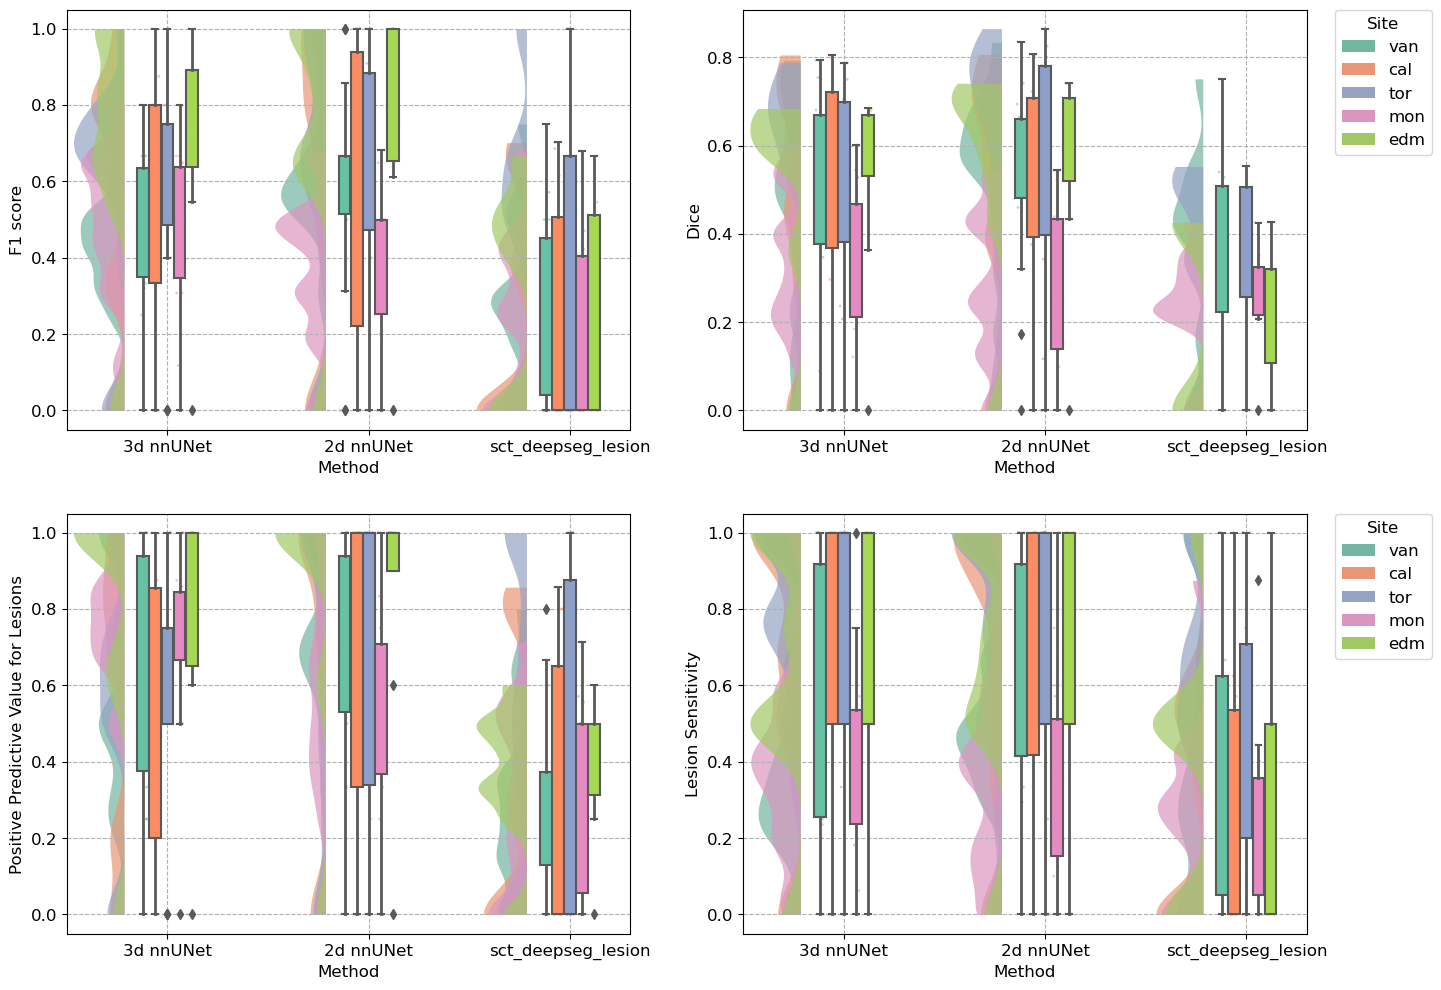

In [20]:
fig = plt.figure(figsize=(16, 12))
plt.rcParams.update({'font.size': 12})
plt.subplot(2, 2, 1)
ax = pt.RainCloud(data=df123,
                          x='Method',
                          y='F1 score',
                          hue='Site',
                          #order=METHODS_TO_LABEL_SC.keys() if pred_type == 'sc' else METHODS_TO_LABEL_LESION.keys(),
                          dodge=True,       # move boxplots next to each other
                          linewidth=0,      # violionplot border line (0 - no line)
                          width_viol=.5,    # violionplot width
                          width_box=.3,     # boxplot width
                          rain_alpha=.5,    # individual points transparency - https://github.com/pog87/PtitPrince/blob/23debd9b70fca94724a06e72e049721426235f50/ptitprince/PtitPrince.py#L707
                          rain_s=2,         # individual points size
                          alpha=.7,         # violin plot transparency
                          box_showmeans=False,  # show mean value inside the boxplots
                        #   box_meanprops={'marker': '^', 'markerfacecolor': 'black', 'markeredgecolor': 'black',
                        #                  'markersize': '6'},       
                          )
#ax.set(xlabel=None)
ax.get_legend().remove()
ax.grid('on', linestyle='--')


plt.subplot(2, 2, 2)
ax = pt.RainCloud(data=df123,
                          x='Method',
                          y='Dice',
                          hue='Site',
                          #order=METHODS_TO_LABEL_SC.keys() if pred_type == 'sc' else METHODS_TO_LABEL_LESION.keys(),
                          dodge=True,       # move boxplots next to each other
                          linewidth=0,      # violionplot border line (0 - no line)
                          width_viol=.5,    # violionplot width
                          width_box=.3,     # boxplot width
                          rain_alpha=.5,    # individual points transparency - https://github.com/pog87/PtitPrince/blob/23debd9b70fca94724a06e72e049721426235f50/ptitprince/PtitPrince.py#L707
                          rain_s=2,         # individual points size
                          alpha=.7,         # violin plot transparency
                          box_showmeans=False,  # show mean value inside the boxplots
                        #   box_meanprops={'marker': '^', 'markerfacecolor': 'black', 'markeredgecolor': 'black',
                        #                  'markersize': '6'},
                          )
#ax.set(xlabel=None)
ax.grid('on', linestyle='--')



plt.subplot(2, 2, 3)
ax = pt.RainCloud(data=df123,
                          x='Method',
                          y='Positive Predictive Value for Lesions',
                          hue='Site',
                          #order=METHODS_TO_LABEL_SC.keys() if pred_type == 'sc' else METHODS_TO_LABEL_LESION.keys(),
                          dodge=True,       # move boxplots next to each other
                          linewidth=0,      # violionplot border line (0 - no line)
                          width_viol=.5,    # violionplot width
                          width_box=.3,     # boxplot width
                          rain_alpha=.5,    # individual points transparency - https://github.com/pog87/PtitPrince/blob/23debd9b70fca94724a06e72e049721426235f50/ptitprince/PtitPrince.py#L707
                          rain_s=2,         # individual points size
                          alpha=.7,         # violin plot transparency
                          box_showmeans=False,  # show mean value inside the boxplots
                         
                        #   box_meanprops={'marker': '*', 'markerfacecolor': 'black', 'markeredgecolor': 'black',
                        #                  'markersize': '6'},
                          )
ax.get_legend().remove()
ax.grid('on', linestyle='--')



plt.subplot(2, 2, 4)
ax = pt.RainCloud(data=df123,
                          x='Method',
                          y='Lesion Sensitivity',
                          hue='Site',
                          #order=METHODS_TO_LABEL_SC.keys() if pred_type == 'sc' else METHODS_TO_LABEL_LESION.keys(),
                          dodge=True,       # move boxplots next to each other
                          linewidth=0,      # violionplot border line (0 - no line)
                          width_viol=.5,    # violionplot width
                          width_box=.3,     # boxplot width
                          rain_alpha=.5,    # individual points transparency - https://github.com/pog87/PtitPrince/blob/23debd9b70fca94724a06e72e049721426235f50/ptitprince/PtitPrince.py#L707
                          rain_s=2,         # individual points size
                          alpha=.7,         # violin plot transparency
                          box_showmeans=False,  # show mean value inside the boxplots
                        #   box_meanprops={'marker': '*', 'markerfacecolor': 'black', 'markeredgecolor': 'black',
                        #                  'markersize': '6'},
                          
                          )
ax.grid('on', linestyle='--')


plt.show()

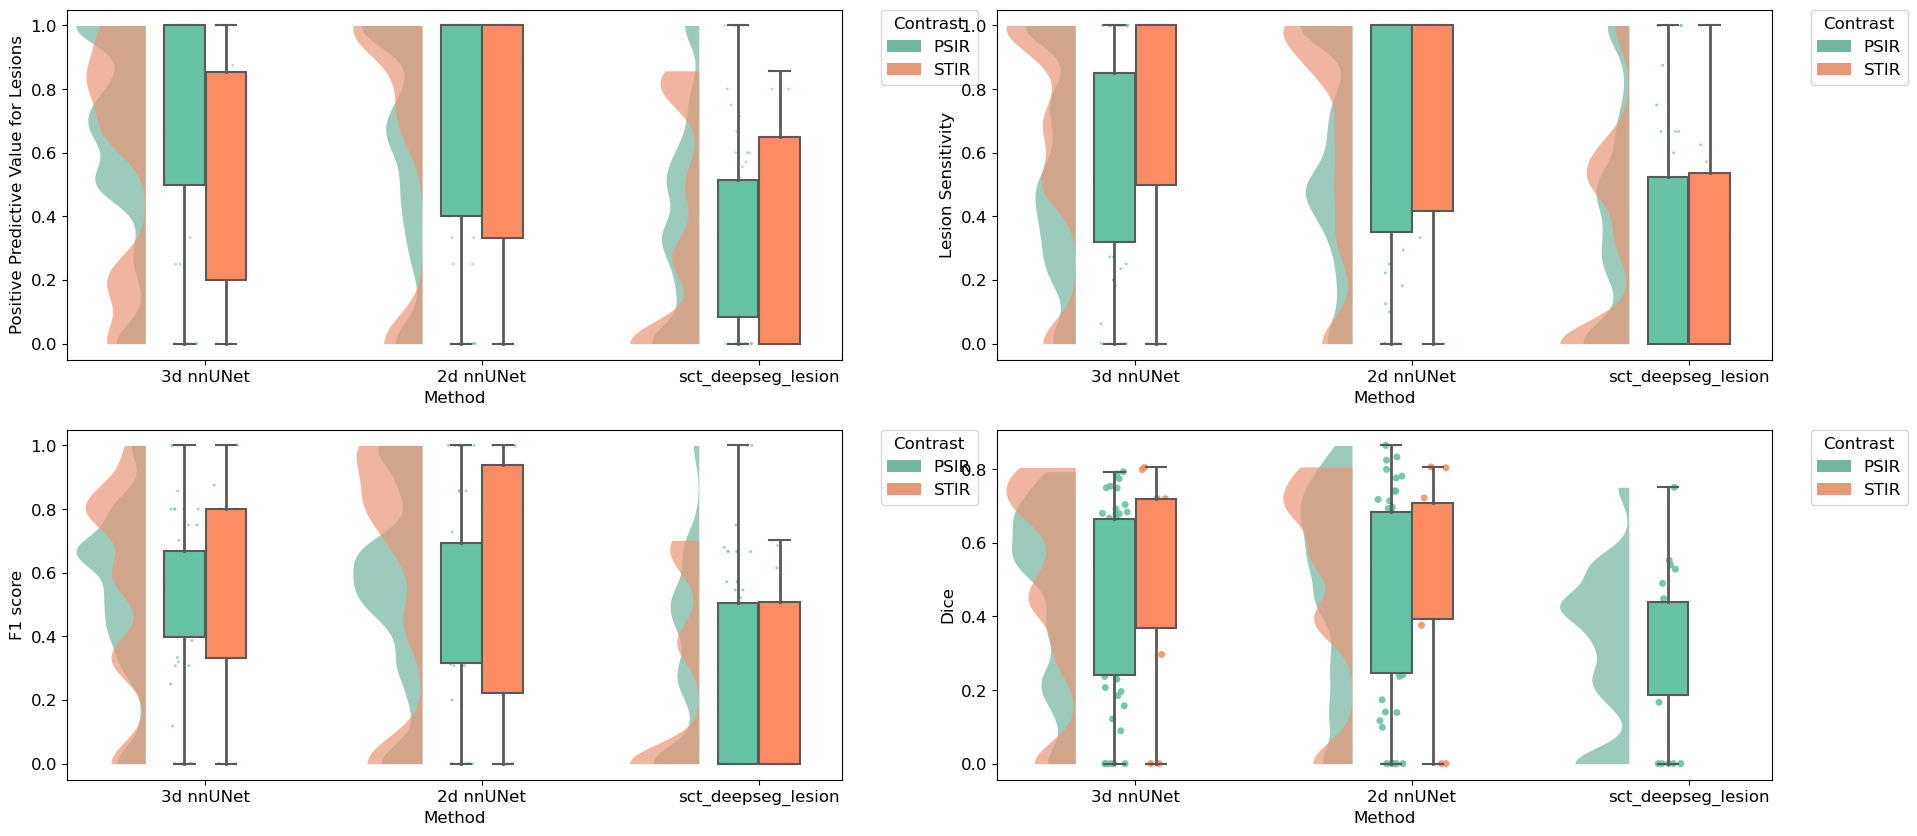

In [21]:
fig = plt.figure(figsize=(22, 10))

plt.subplot(2, 2, 1)
ax = pt.RainCloud(data=df123,
                          x='Method',
                          y='Positive Predictive Value for Lesions',
                          hue='Contrast',
                          #order=METHODS_TO_LABEL_SC.keys() if pred_type == 'sc' else METHODS_TO_LABEL_LESION.keys(),
                          dodge=True,       # move boxplots next to each other
                          linewidth=0,      # violionplot border line (0 - no line)
                          width_viol=.5,    # violionplot width
                          width_box=.3,     # boxplot width
                          rain_alpha=.5,    # individual points transparency - https://github.com/pog87/PtitPrince/blob/23debd9b70fca94724a06e72e049721426235f50/ptitprince/PtitPrince.py#L707
                          rain_s=2,         # individual points size
                          alpha=.7,         # violin plot transparency
                          box_showmeans=True,  # show mean value inside the boxplots
                          box_meanprops={'marker': '^', 'markerfacecolor': 'black', 'markeredgecolor': 'black',
                                         'markersize': '6'},
                                         
                          )

plt.subplot(2, 2, 2)
ax = pt.RainCloud(data=df123,
                          x='Method',
                          y='Lesion Sensitivity',
                          hue='Contrast',
                          #order=METHODS_TO_LABEL_SC.keys() if pred_type == 'sc' else METHODS_TO_LABEL_LESION.keys(),
                          dodge=True,       # move boxplots next to each other
                          linewidth=0,      # violionplot border line (0 - no line)
                          width_viol=.5,    # violionplot width
                          width_box=.3,     # boxplot width
                          rain_alpha=.7,    # individual points transparency - https://github.com/pog87/PtitPrince/blob/23debd9b70fca94724a06e72e049721426235f50/ptitprince/PtitPrince.py#L707
                          rain_s=2,         # individual points size
                          alpha=.7,         # violin plot transparency
                          box_showmeans=True,  # show mean value inside the boxplots
                          box_meanprops={'marker': '^', 'markerfacecolor': 'black', 'markeredgecolor': 'black',
                                         'markersize': '6'},
                          )

plt.subplot(2, 2, 3)
ax = pt.RainCloud(data=df123,
                          x='Method',
                          y='F1 score',
                          hue='Contrast',
                          #order=METHODS_TO_LABEL_SC.keys() if pred_type == 'sc' else METHODS_TO_LABEL_LESION.keys(),
                          dodge=True,       # move boxplots next to each other
                          linewidth=0,      # violionplot border line (0 - no line)
                          width_viol=.5,    # violionplot width
                          width_box=.3,     # boxplot width
                          rain_alpha=.7,    # individual points transparency - https://github.com/pog87/PtitPrince/blob/23debd9b70fca94724a06e72e049721426235f50/ptitprince/PtitPrince.py#L707
                          rain_s=2,         # individual points size
                          alpha=.7,         # violin plot transparency
                          box_showmeans=True,  # show mean value inside the boxplots
                          box_meanprops={'marker': '^', 'markerfacecolor': 'black', 'markeredgecolor': 'black',
                                         'markersize': '6'},
                          )

plt.subplot(2, 2, 4)
ax = pt.RainCloud(data=df123,
                          x='Method',
                          y='Dice',
                          hue='Contrast',
                          #order=METHODS_TO_LABEL_SC.keys() if pred_type == 'sc' else METHODS_TO_LABEL_LESION.keys(),
                          dodge=True,       # move boxplots next to each other
                          linewidth=0,      # violionplot border line (0 - no line)
                          width_viol=.5,    # violionplot width
                          width_box=.3,     # boxplot width
                          rain_alpha=.9,    # individual points transparency - https://github.com/pog87/PtitPrince/blob/23debd9b70fca94724a06e72e049721426235f50/ptitprince/PtitPrince.py#L707
                          rain_s=5,         # individual points size
                          alpha=.7,         # violin plot transparency
                          box_showmeans=True,  # show mean value inside the boxplots
                          box_meanprops={'marker': '^', 'markerfacecolor': 'black', 'markeredgecolor': 'black',
                                         'markersize': '6'},
                          )

plt.show()

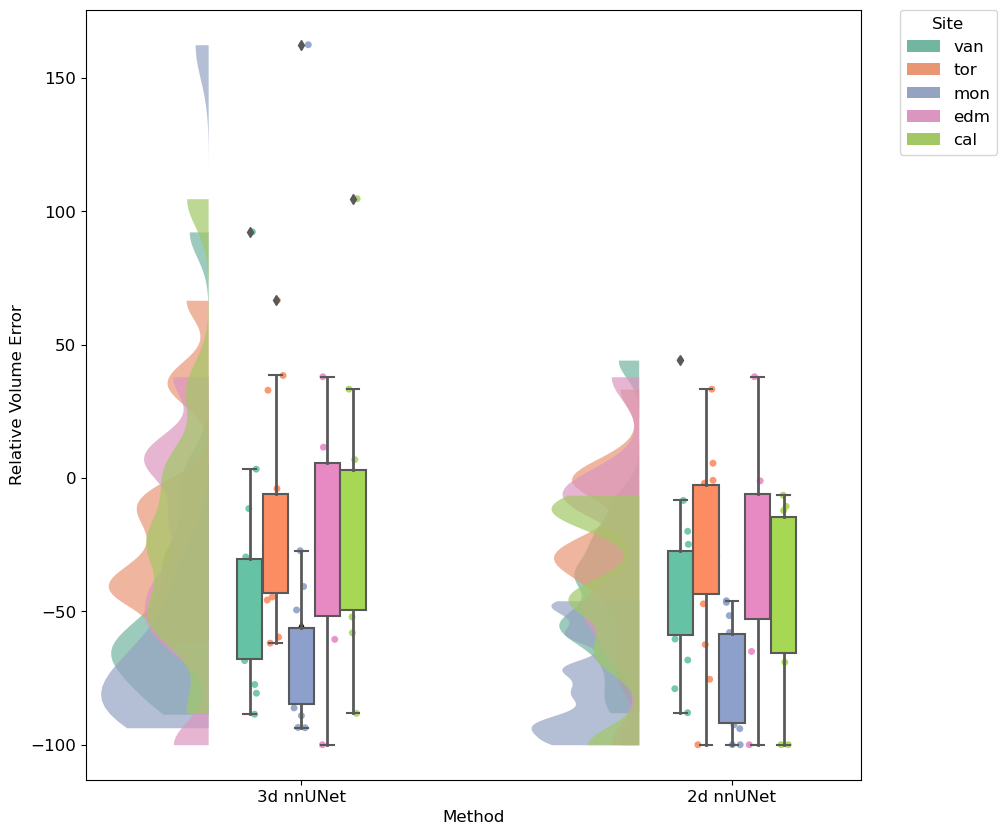

In [22]:
df1 = metrics_mul[2].copy()
df1['method']='3d nnUNet'
df2 = metrics_2d_mul[2].copy()
df2['method']='2d nnUNet'

df12 = pd.concat([df1, df2])

#we rename the columns
df12 = df12.rename(columns={'method': 'Method', 'site': 'Site', 'PPVL': 'Positive Predictive Value for Lesions', 'SensL': 'Lesion Sensitivity', 'F1_score': 'F1 score', 'RelativeVolumeError': 'Relative Volume Error', 'contrast': 'Contrast'})

#remove outliers from relative volume error
df12 = df12[df12['Relative Volume Error'] < 200]

# we plot relative volume error per phenotype
plt.figure(figsize=(10, 10))
ax = pt.RainCloud(data=df12,
                          x='Method',
                          y='Relative Volume Error',
                          hue='Site',
                          #order=METHODS_TO_LABEL_SC.keys() if pred_type == 'sc' else METHODS_TO_LABEL_LESION.keys(),
                          dodge=True,       # move boxplots next to each other
                          linewidth=0,      # violionplot border line (0 - no line)
                          width_viol=.5,    # violionplot width
                          width_box=.3,     # boxplot width
                          rain_alpha=.9,    # individual points transparency - https://github.com/pog87/PtitPrince/blob/23debd9b70fca94724a06e72e049721426235f50/ptitprince/PtitPrince.py#L707
                          rain_s=5,         # individual points size
                          alpha=.7,         # violin plot transparency
                          box_showmeans=True,  # show mean value inside the boxplots
                          box_meanprops={'marker': '^', 'markerfacecolor': 'black', 'markeredgecolor': 'black',
                                         'markersize': '6'},
                          )